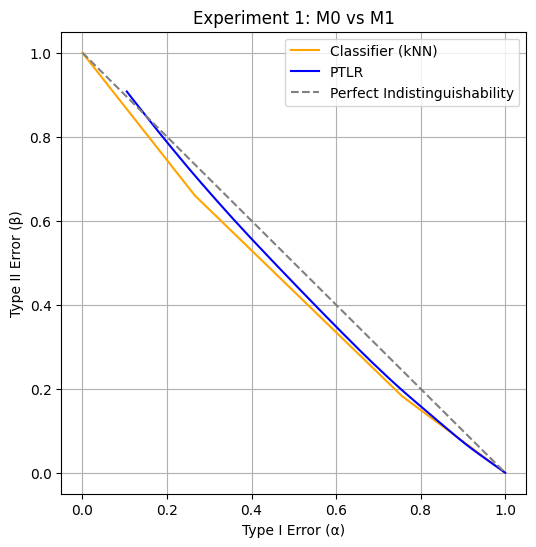

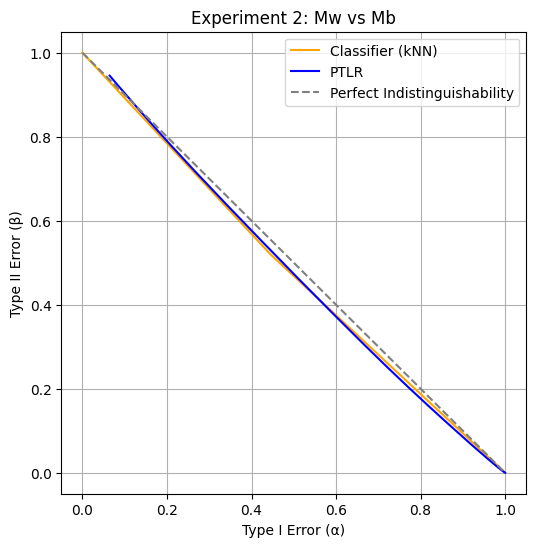

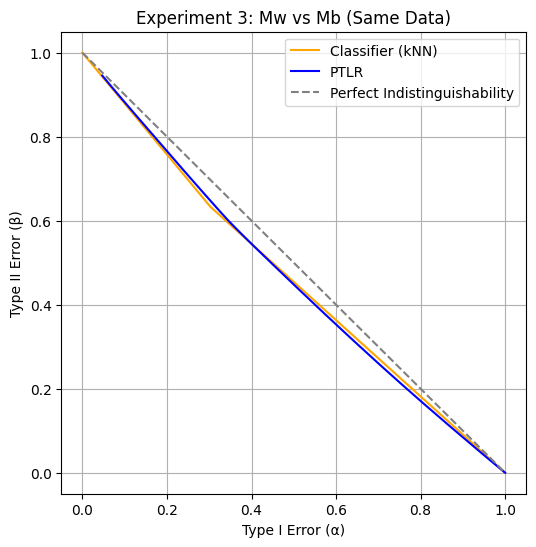

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

# Move to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
os.chdir(project_root)
sys.path.append(os.path.join(project_root, "src"))

from mech.inference_sampler import InferenceEstimator, InferencePTLREstimator

def run_curve(x0_path, x1_path, title):
    kwargs = {
        "h": 0.1,
        "dataset": {
            "x0_logits": np.load(x0_path),
            "x1_logits": np.load(x1_path)
        },
        "ss_alg": {"m": 5, "sigma": 1.0},
        "num_samples": 10000,
        "num_train_samples": 8000,
        "num_test_samples": 2000
    }

    # ---- Classifier-based Estimator ----
    clf = InferenceEstimator(kwargs)
    clf.build(eta=np.linspace(0.1, 20, 50), classifier_args={'name': 'kNN'})
    alphas_clf = np.array(clf.output_["alpha"])
    betas_clf  = np.array(clf.output_["beta"])

    # ---- PTLR Estimator ----
    ptlr = InferencePTLREstimator(kwargs)
    ptlr.build(eta_max=20)
    alphas_ptlr = np.array(ptlr.output_["alpha"])
    betas_ptlr  = np.array(ptlr.output_["beta"])

    # ---- Plot ----
    plt.figure(figsize=(6,6))
    plt.plot(alphas_clf, betas_clf, label="Classifier (kNN)", color="orange")
    plt.plot(alphas_ptlr, betas_ptlr, label="PTLR", color="blue")
    plt.plot([0,1], [1,0], "--", color="gray", label="Perfect Indistinguishability")

    plt.title(title)
    plt.xlabel("Type I Error (α)")
    plt.ylabel("Type II Error (β)")
    plt.legend()
    plt.grid(True)
    plt.show()


# === Run all 3 experiments ===

run_curve("../fdp-estimation/outputs/exp1_logits_M0.npy",
          "../fdp-estimation/outputs/exp1_logits_M1.npy",
          "Experiment 1: M0 vs M1")

run_curve("../fdp-estimation/outputs/exp2_logits_Mw.npy",
          "../fdp-estimation/outputs/exp2_logits_Mb.npy",
          "Experiment 2: Mw vs Mb")

run_curve("../fdp-estimation/outputs/exp3_logits_Mw.npy",
          "../fdp-estimation/outputs/exp3_logits_Mb.npy",
          "Experiment 3: Mw vs Mb (Same Data)")